In [13]:
import litebird_sim as lbs
import numpy as np
import healpy as hp
from dataclasses import asdict
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
nside = 512
mission_time_is_sec = 24 * 3600
instrument = "MFT"
channel = "M1-140"
sampling = 1  # this replaces channelinfo.sampling_rate_hz

In [3]:
imo = lbs.Imo()
sim = lbs.Simulation(
    base_path="./tutorial",
    start_time=0,
    duration_s=mission_time_is_sec,
)

In [4]:
mft_file = sim.imo.query("/releases/v1.3/satellite/" + instrument + "/instrument_info")
sim.generate_spin2ecl_quaternions(
    imo_url="/releases/v1.3/satellite/scanning_parameters/"
)

instrumentinfo = lbs.InstrumentInfo.from_imo(
    imo, f"/releases/v1.3/satellite/{instrument}/instrument_info"
)

channelinfo = lbs.FreqChannelInfo.from_imo(
    url="/releases/v1.3/satellite/" + instrument + "/" + channel + "/channel_info",
    imo=imo,
)
hwp_radpsec = lbs.IdealHWP(
    instrumentinfo.hwp_rpm * 2 * np.pi / 60,
).ang_speed_radpsec

[2022-10-28 10:19:15,058 WARNING MPI#0000] Band is not apodized


In [30]:
dets = []
detquats = []

for detname in channelinfo.detector_names:
    det = lbs.DetectorInfo.from_imo(
        url="/releases/v1.3/satellite/"
        + instrument
        + "/"
        + channel
        + "/"
        + detname
        + "/detector_info",
        imo=imo,
    )
    det.sampling_rate_hz = sampling
    dets.append(det)
    detquats.append(det.quat)

[2022-10-28 10:25:22,408 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,410 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,413 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,414 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,416 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,417 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,418 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,419 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,420 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,421 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,422 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,423 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,424 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,425 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,425 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,426 WARNING MPI#000

[2022-10-28 10:25:22,512 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,513 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,514 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,514 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,515 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,516 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,517 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,518 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,519 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,519 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,520 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,521 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,522 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,523 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,524 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,525 WARNING MPI#000

[2022-10-28 10:25:22,605 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,607 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,607 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,608 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,608 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,609 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,609 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,610 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,610 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,611 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,612 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,612 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,613 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,613 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,614 WARNING MPI#0000] Band is not apodized
[2022-10-28 10:25:22,614 WARNING MPI#000

## Fill tod and then build map

In [46]:
(obs,) = sim.create_observations(detectors=dets)

(pointings,) = lbs.get_pointings_for_observations(
    sim.observations,
    spin2ecliptic_quats=sim.spin2ecliptic_quats,
    bore2spin_quat=instrumentinfo.bore2spin_quat,
    hwp=None,
    # lbs.IdealHWP(
    #    inst_info.hwp_rpm * 2 * np.pi / 60,
    # ),  # applies hwp rotation angle to the polarization angle
    store_pointings_in_obs=True,  # if True, stores colatitude and longitude in
    # sim.observations[:].pointings, and the polarization angle in
    # sim.observations[:].psi
)

In [47]:
Mbsparams = lbs.MbsParameters(
    make_cmb=True,
    make_fg=False,
    gaussian_smooth=True,
    bandpass_int=False,
    nside=nside,
)

mbs = lbs.Mbs(
    simulation=sim,
    parameters=Mbsparams,
    channel_list=channelinfo,
)
maps = mbs.run_all()[0][channel]

[2022-10-28 10:27:46,456 INFO MPI#0000] generating and saving cmb simulations
[2022-10-28 10:27:46,674 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2022-10-28 10:27:46,675 INFO MPI#0000] -> fwhm is 0.000000 arcmin
/home/sgiardie/anaconda3/envs/lbs_env/lib/python3.8/site-packages/pysm3/utils/data.py:37: UserWarning: Access data from /home/sgiardie/lbs/out_of_band/litebird_sim/litebird_sim/hwp_sys/examples/tutorial/cmb/0000/cmb_0000_date_221028.fits
  warnings.warn(f"Access data from {full_path}")
[2022-10-28 10:27:47,561 WARNING MPI#0000] AstropyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
[2022-10-28 10:27:47,563 INFO MPI#0000] NSIDE = 512
[2022-10-28 10:27:47,563 INFO MPI#0000] ORDERING = RING in fits file
[2022-10-28 10:27:47,564 INFO MPI#0000] INDXSCHM = IMPLICIT


***************** D
***************** D
***************** D


[2022-10-28 10:27:53,341 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2022-10-28 10:27:53,341 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2022-10-28 10:27:53,386 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2022-10-28 10:27:53,387 INFO MPI#0000] -> fwhm is 0.000000 arcmin


In [48]:
hwp_sys = lbs.HwpSys(sim)
hwp_sys.set_parameters(
    maps=maps,
    integrate_in_band=False,
    correct_in_solver=False,
    built_map_on_the_fly=False,
    nside=nside,
)

In [49]:
hwp_sys.fill_tod(
    obs=obs,  # pointings = pointings, #optional since we have saved point in obs
    hwp_radpsec=hwp_radpsec,
)
obs.tod *= 2.0  #

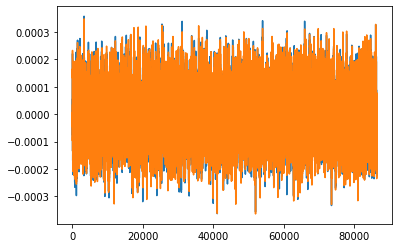

In [50]:
plt.plot(obs.tod[0])
plt.plot(obs.tod[1])

In [51]:
m = lbs.make_bin_map([obs], nside)

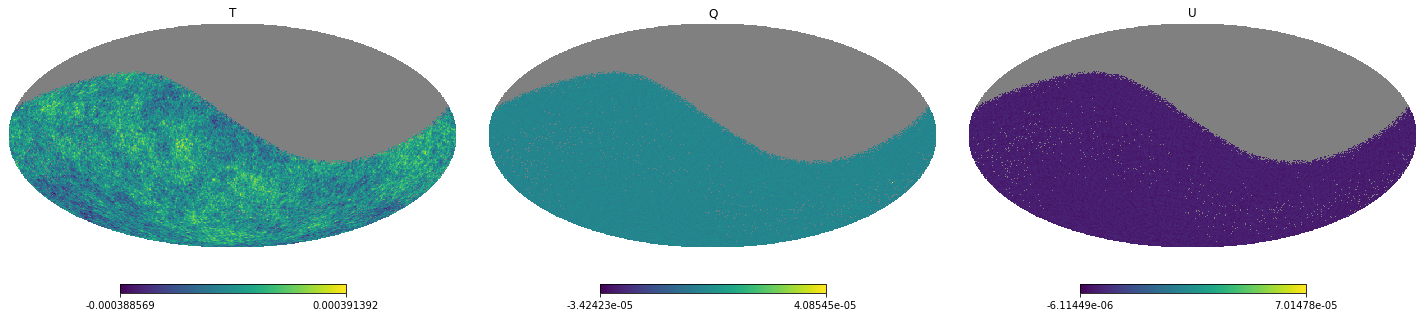

In [53]:
fig = plt.figure(figsize=(20, 10))
hp.mollview(m[0], sub=131, title="T")
hp.mollview(m[1], sub=132, title="Q")
hp.mollview(m[2], sub=133, title="U")

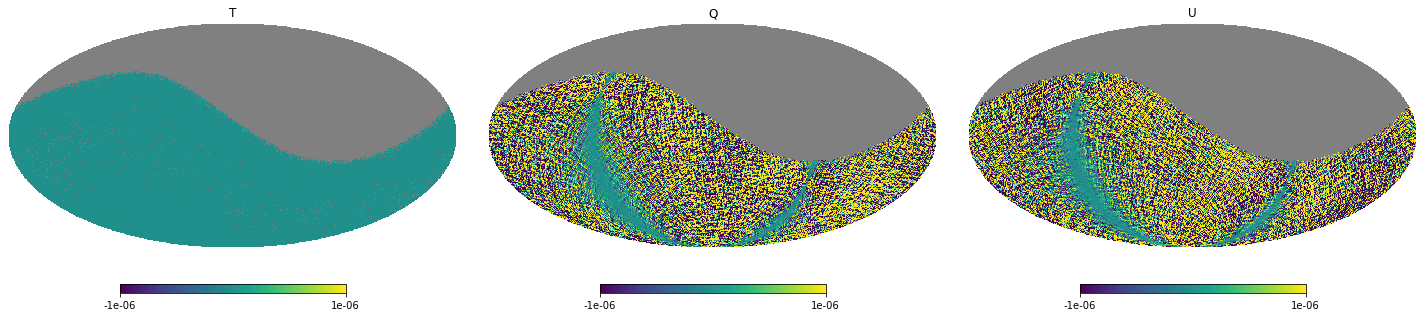

In [54]:
fig = plt.figure(figsize=(20, 10))
hp.mollview(m[0] - maps[0], sub=131, title="T", min=-1e-6, max=1e-6)
hp.mollview(m[1] - maps[1], sub=132, title="Q", min=-1e-6, max=1e-6)
hp.mollview(m[2] - maps[2], sub=133, title="U", min=-1e-6, max=1e-6)

## Built map on the fly

In [55]:
# obs.tod not allocated
(obs,) = sim.create_observations(detectors=dets)

In [56]:
hwp_sys = lbs.HwpSys(sim)
# Here the obs.tod is not filled
hwp_sys.set_parameters(
    maps=maps,
    integrate_in_band=False,
    correct_in_solver=False,
    built_map_on_the_fly=True,
    nside=nside,
)

In [57]:
hwp_sys.fill_tod(obs=obs, pointings=pointings, hwp_radpsec=hwp_radpsec)

In [58]:
m = hwp_sys.make_map([obs])

In [59]:
m.shape

(3, 3145728)

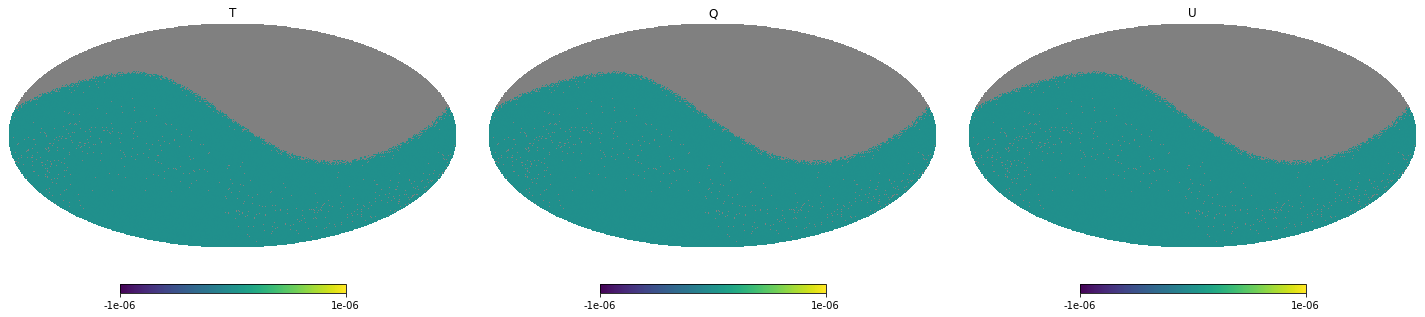

In [60]:
fig = plt.figure(figsize=(20, 10))
hp.mollview(m[0] - maps[0], sub=131, title="T", min=-1e-6, max=1e-6)
hp.mollview(m[1] - maps[1], sub=132, title="Q", min=-1e-6, max=1e-6)
hp.mollview(m[2] - maps[2], sub=133, title="U", min=-1e-6, max=1e-6)